In [43]:
from fastai.vision import *

In [44]:
import torch
torch.cuda.is_available()

True

In [45]:
classes = ['two_lane','three_lane']

In [46]:
path = Path('/home/qxz0dis/work/dump/course-v3/lane_data')
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

two_lane


three_lane


In [47]:
path.ls

<bound method <lambda> of PosixPath('/home/qxz0dis/work/dump/course-v3/lane_data')>

In [48]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [49]:
data.classes

['three_lane', 'two_lane']

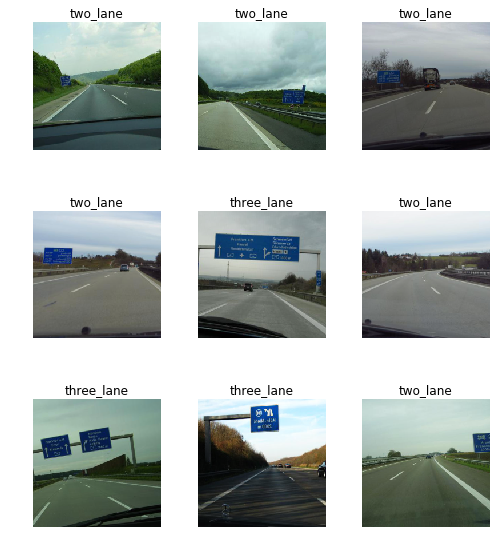

In [50]:
data.show_batch(rows=3, figsize=(7,8))

In [51]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['three_lane', 'two_lane'], 2, 214, 53)

In [52]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [53]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.003379,0.689256,0.339623,00:24
1,0.882693,1.341193,0.377358,00:28
2,0.715269,1.330984,0.358491,00:29
3,0.643017,1.041323,0.301887,00:29


In [55]:
learn.save('new-stage-1')

In [56]:
learn.unfreeze()

In [57]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


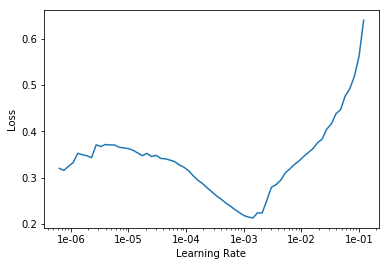

In [58]:
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.468318,0.624004,0.150943,00:43
1,0.370649,0.443338,0.113208,00:47


In [60]:
learn.save('new-stage-2')

In [61]:
interp = ClassificationInterpretation.from_learner(learn)

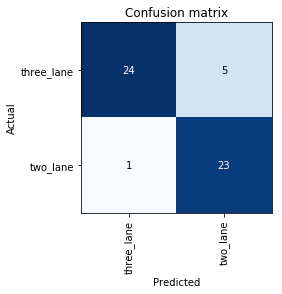

In [62]:
interp.plot_confusion_matrix()

In [63]:
from fastai.widgets import *

In [64]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [69]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('new-stage-2');

In [70]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [71]:
learn.export()

In [72]:
defaults.device = torch.device('cpu')

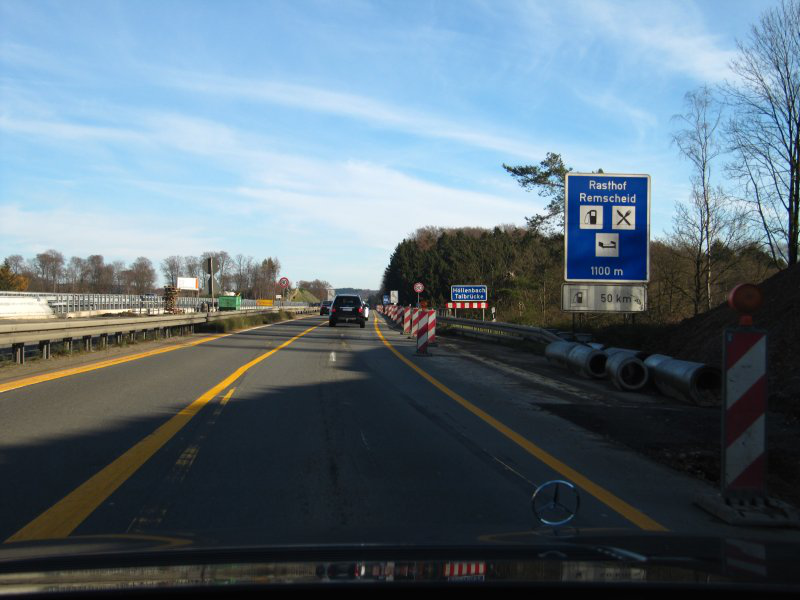

In [84]:
img = open_image('/home/qxz0dis/Downloads/a1_data/A1_files/IMG_2039.JPG')
img

In [85]:
learn = load_learner(path)

In [96]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)

two_lane
